# **Sentiment analysis and feminism: to what extent should Twitter be used to represent UK public opinion in Data Analytics?**

## Python 3 code for submission with thesis for MSc Artificial Intelligence and Applications 2019/2020

## Annie Rose Benzie
## Student Registration Number: 201971007

NB: Please upload merged(1).csv and symbol2.jpg file which are required to run the project.

## PART 1: EXTRACTING TWEETS USING GETOLDTWEETS3 

In [ ]:
!pip install GetOldTweets3 #installing library to extract tweets

Necessary libraries and packages will be imported at the beginning of each section. Firstly, we need GetOldTweets3 which is a Python library used to extract tweets. There are many ways to use GetOldTweets3 but for the purposes of this study, we will extract the tweets using specific search terms related to feminism and gender attitudes. In total, 27 search terms were individually used and each created a CSV file. Each search term which was searched has been left in the comments. These individual CSV files were then all combined to create the CSV file 'merged(1)' which has been attached for direct use. **With this in mind, Part 1 does not need to be run to gather dataset, as extremely recent data would be collected. Please use merged(1).csv which is attached in the dissertation zip file from Part 2 onwards.**



In [ ]:
import GetOldTweets3 as got
import pandas as pd #pandas used so we can create a dataframe
import os, glob

In [ ]:
# Function that pulls tweets based on a general search query and turns to csv file

# Parameters used here: (query), (max number of most recent tweets to extract from Twitter)
def text_query_to_csv(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)\
                                                #.setNear(country)

                                                
    # List of all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Making list of selected tweet data
    text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

    # Making a dataframe from the tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text'])

    # Converting tweets dataframe to csv file
    tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query,  int(count/1000)), sep=',')

In [ ]:
# Input search query to scrape tweets and name csv file

text_query = 'sexual equality UK'
#search queries: feminism UK, feminist UK, feminist rights UK, gender UK, womens rights UK, women rights UK
#women liberation movement UK, womens liberation movement UK, feminism movement UK, feminist movement UK, womens liberation UK, women liberation UK, womens lib UK, 
#women lib UK, gender rights UK, gender equality UK, libber UK, womens liberationist UK, women liberationist UK,
#womens rightist UK, women rightist UK, gender attitudes UK, sexuality UK, women UK, female rights UK, women in work UK, suffrage UK, 
#female equality UK, sexual equality UK

#country = 'United Kingdom'
count = 10000 #10000 seems to be the maximum that can be extracted from each search term

# Calling function to create a CSV file of relevant tweets given the count
text_query_to_csv(text_query, count)

The files can then be combined to create one CSV file which can be used from now on

In [ ]:
#path = "../../csv/"
path = "/content/Data" #of course, all 27 separate CSV files were uploaded to Colab's content file

all_files = glob.glob(os.path.join(path, "data_*.csv")) #Joining all files starting with name "data_" in the Colab directory

all_csv = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(all_csv, ignore_index=True)
df_merged.to_csv( "merged(1).csv")

In [ ]:
pd.read_csv('merged(1).csv') #CSV of all tweets combined

## PART 2: LOADING THE DATA

Using Google Colab means that installing popular packages is often unnecessary. If using the likes of Jupyter notebooks, the below needs to be installed.

In [ ]:
#pip install -U scikit-learn
#!pip install wordcloud

The following libraries and packages are needed 

In [1]:
import scipy
import sklearn
from sklearn import model_selection

import nltk #Natural language toolkit comprised of a number of packages to aid preprocessing of text data
nltk.download("popular") #Popular package contains NLTK stop words 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Creates word cloud visualisations
import string #Used when removing punctuation
from nltk import word_tokenize
import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
import re

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
datafile = '/content/merged (1).csv' #Loading the csv file attached in the dissertation zip file. Contains tweets scraoed using the 27 search terms above.

In [3]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

reindexed_data = raw_data['Text'].astype(str)

reindexed_data.index = raw_data['Datetime']

raw_data.head()

Unnamed: 0  ...                                               Text
0          0  ...  It's so funny when they say that ariana is a w...
1          1  ...  No, I hadn't heard that a woman had said that....
2          2  ...  Hey Joey: what in hell do you know about this ...
3          3  ...  Chris Grayling's rape comments raise fury afte...
4          4  ...  Yeah. Sneaky bastard men taking our human righ...

[5 rows x 4 columns]

The first 2 variables, Unnamed: 0 and Unnamed: 0.1 are redundant here so can be removed below

In [4]:
raw_data = raw_data.drop(columns=["Unnamed: 0"]) 
raw_data = raw_data.drop(columns=["Unnamed: 0.1"])

In [5]:
data = raw_data.copy() #Creating a copy to avoid slicing error

In [6]:
#Dropping dates before 2017
data = data.sort_values(by='Datetime',ascending=True)
data


Datetime                                               Text
37528  2006-12-05 16:22:58+00:00  preparing for a presentation on Thursday on th...
37527  2006-12-06 22:48:52+00:00  Just finished writing my presentation on the c...
13297  2008-09-17 04:28:44+00:00  Lily Allen is the best female singer in UK rig...
37526  2008-11-04 18:40:25+00:00  Woman in 1913 Corsham pilgrimage for the right...
13296  2009-01-28 09:18:09+00:00  From the Net: UK: Jailed al-Qaeda Terrorist Th...
...                          ...                                                ...
71941  2020-06-27 13:36:55+00:00  Starmer really needs to show some back bone an...
71940  2020-06-27 13:37:15+00:00     Yes it was the sentence that jumped out at me.
71939  2020-06-27 13:38:17+00:00  I agree nobody should troll or threaten jobs. ...
25816  2020-06-27 14:01:27+00:00  The #Queen and the #PrimeMinister have saluted...
47051  2020-06-27 14:08:01+00:00  Because Equality Act in UK allows for sex-segr...

[82086 rows x 2 columns]

In [7]:
data = data.iloc[7790:] #dropping 7790 entries before 2017 

In [8]:
data = data.dropna() #dropping any missing values

In [9]:
data.shape #shape of the dataset without missing values and only entries from the period 2017-2020

(74167, 2)

In [10]:
data.head() #checking dates have been removed

Datetime                                               Text
61110  2017-01-01 10:08:05+00:00  Your mission for 2017...encourage 3 people to ...
61109  2017-01-02 16:06:48+00:00  That's not to say there's not a lot more to be...
13685  2017-01-02 23:19:03+00:00  Agreed.In my opinion, equal movement in UK/US ...
36030  2017-01-03 13:32:54+00:00  The women's suffrage movement and Keir Hardie ...
15447  2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean fo...

## PART 3: DETERMINE SENTIMENT USING TEXTBLOB

Again, the below should be installed when using another environment, however this is not necessary when running code on Google Colab.

In [ ]:
#pip install -U textblob #how to download textblob library when using Jupyter notebooks
#python -m textblob.download_corpora

In [11]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [12]:
reindexed_data = data['Text'].astype(str)

reindexed_data.index = data['Datetime']

Positive, neutral and negative sentences are created and used below to test how TextBlob determines polarity and subjectivity scores and check that this works. In reality, TextBlob has already been trained using NLTK vocabulary so does not require further training.

In [13]:
positive_sentence = "Feminism is the best! It's so important and I love it"
neutral_sentence = "Here is some news on feminism."
negative_sentence = "Feminism is the worst. I hate it and it should not be part of our society"

In [14]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

Below we can see that key words used in positive and negative sentences stored in the NLTK corpus are picked up by the library which alters the polarity and subjectivity scores. 

In [15]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.6333333333333333, subjectivity=0.6333333333333333)
Neutral sentence:  Sentiment(polarity=0.0, subjectivity=0.0)
Negative sentence:  Sentiment(polarity=-0.9, subjectivity=0.95)


## PART 4: FIRST EDA TO SHOW POLARITY COUNTS, DENSITY, 3D SCATTERPLOT

In [16]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [17]:
blobs = [TextBlob(reindexed_data[i]) for i in range(reindexed_data.shape[0])] #We can then apply this to our actual dataset, remembering that the reindexed_data in this case is the text

In [18]:
polarity = [blob.polarity for blob in blobs]
subjectivity = [blob.subjectivity for blob in blobs]

sentiment_analysed = pd.DataFrame({'Text':reindexed_data, 
                                   'polarity':polarity, 
                                   'subjectivity':subjectivity},
                                  index=reindexed_data.index)

In [19]:
sentiment_analysed.head(5) #A new dataframe showing the tweets, along with their respective polarity and subjectivity scores

Text  ...  subjectivity
Datetime                                                                      ...              
2017-01-01 10:08:05+00:00  Your mission for 2017...encourage 3 people to ...  ...        0.0000
2017-01-02 16:06:48+00:00  That's not to say there's not a lot more to be...  ...        0.5000
2017-01-02 23:19:03+00:00  Agreed.In my opinion, equal movement in UK/US ...  ...        0.1250
2017-01-03 13:32:54+00:00  The women's suffrage movement and Keir Hardie ...  ...        0.0000
2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean fo...  ...        0.6875

[5 rows x 3 columns]

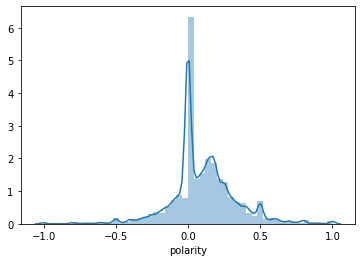

In [20]:
sns.distplot(sentiment_analysed['polarity']) #density plot showing the distribution of polarity scores, most of which seem to be either neutral or positive

In [21]:
counts, bin_edges = np.histogram(polarity, bins=5) #This shows us exactly how many instances fall into each category, emphasising that most are neutral or positive
print(counts)


[  425  4329 50091 17653  1669]


In [22]:
sentiment_analysed['Text'][350] #taking a random tweet to check its scores

"@BorisJohnson today appointed a Special Envoy for Gender Equality. UK committed to defending &amp; promoting women's rights, for the good of all"

In [23]:
text_blob_object = TextBlob(sentiment_analysed['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.5285714285714286, subjectivity=0.5857142857142857)


The above scores are satisfactory, as the tweets is firstly neutral but is positive in the regard that the UK wish to defend and promote rights.

In [24]:
pd.set_option('max_colwidth', 150) #increasing size of columns to make tweets easier to read and check sentiment score

We can now look further into tweets which have a score of -1 (highly negative) and 1 (highly positive)

In [25]:
most_negative = sentiment_analysed[sentiment_analysed.polarity == -1].Text.head() 
print(most_negative)

Datetime
2017-02-24 19:50:44+00:00                                                   18 countries ranked by gender equality at work (and the UK is one of the worst) http://buff.ly/2l9YaMp
2017-03-05 14:19:56+00:00                                                                                  When you still think gender equality exists in 2017, in the bloody UK! 
2017-03-08 17:13:28+00:00                           #RWL17 it's outrageous that we are still having to discuss gender equality in the UK. Well done @Unilever for leading the way.
2017-03-08 17:19:00+00:00    UK has one of worst records for gender equality at work #InternationalWomensDay https://www.theguardian.com/society/2016/may/18/uk-has-one-of-wors...
2017-04-06 15:12:23+00:00    #UK has one of worst records for gender #equality at #work – report https://www.theguardian.com/society/2016/may/18/uk-has-one-of-worst-records-fo...
Name: Text, dtype: object


In [26]:
most_positive = sentiment_analysed[sentiment_analysed.polarity == 1].Text.head()
print(most_positive)

Datetime
2017-03-02 11:17:52+00:00                                     We're very happy to see #UKaid fighting for gender equality worldwide. Thank you @DFID_UK @patel4witham! #SheDecides
2017-03-12 20:48:15+00:00    Excellent article on where progress has stalled on gender equality @wep_uk #WeAreWe #equality https://blog.esrc.ac.uk/2017/03/08/social-science-he...
2017-04-18 19:39:33+00:00                                                                       So proud to be apart of the campaign!! #NotJustAGirlsJob #PA #Gender #Equality #UK
2017-05-04 08:48:31+00:00            "In the UK we think we've achieved gender equality - yet the best country in the world for women's representation is Rwanda. The UK is 49th" 
2017-06-03 17:51:30+00:00                          In fact one of the best collections of UK suffrage posters is that compiled by Alice Park &amp; now in @SchlesingerLib Harvard 
Name: Text, dtype: object


The library tends to make a few errors, but overall this is satisfactory as the majority are classed correctly and it could be stated that labelling, even by hand, is always subject to bias in some way. 

The length of the tweets can now be looked at, just to see how many outliers there are. This is a good indication of how much preprocessing needs to be done, as tweets have a character limit of 280.

In [27]:
sentiment_analysed['tweet_length'] = [len(t) for t in sentiment_analysed.Text] #determining length of tweets

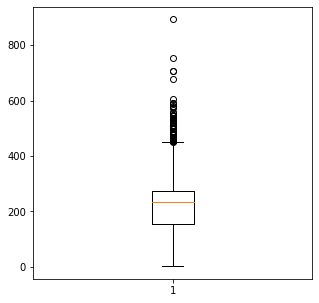

In [28]:
fig, ax = plt.subplots(figsize=(5, 5)) #showing the length in a box plot to show distribution and clear outliers
plt.boxplot(sentiment_analysed.tweet_length)
plt.show()

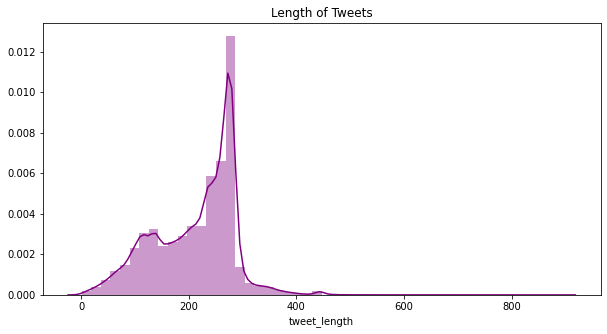

In [29]:
fig = plt.figure(figsize=(10, 5)) #showing length in a histogram/density plot which is clearer and shows the majority of tweets are 280 characters or less which is correct
ax = sns.distplot(sentiment_analysed['tweet_length'], color="purple")
ax = plt.title("Length of Tweets")

In [30]:
sentiment_analysed[sentiment_analysed.tweet_length > 280].head(5) #showing the top 5 tweets over 280 characters

Text  ...  tweet_length
Datetime                                                                                                                                                                          ...              
2017-01-19 12:30:01+00:00  Independent interview the female directors who will dominate 2017 & mention our gender equality report http://www.independent.co.uk/arts-entertain...  ...           289
2017-01-19 12:30:01+00:00  Independent interview the female directors who will dominate 2017 &amp; mention our gender equality report http://www.independent.co.uk/arts-enter...  ...           293
2017-01-22 20:48:48+00:00  Most men in the UK are allies to women’s equality, but 1/5th of men aged 25-34 don’t want gender equality at all. http://www.fawcettsociety.org.uk...  ...           408
2017-02-14 16:01:44+00:00  #waspi While UK womans rights are abused by tory policy EU forges ahead on gender equality see https://lnks.gd/l/eyJhbGciOiJIUzI1NiJ9.eyJlbWFpbCI6...  ...           556
2017-03-09 10:18:02+00:00  Breaking barriers: Improving gender equality in the UK energy sector http://www.edie.net/news/6/Breaking-barriers-Improving-gender-equality-in-the...  ...           358

[5 rows x 4 columns]

### 3D PLOT SHOWING POLARITY, WORD COUNT AND SUBJECTIVITY

In [ ]:
x = sentiment_analysed['tweet_length'] #comparing tweet length with subjectivity and polarity scores 
y = sentiment_analysed['subjectivity']
z = sentiment_analysed['polarity']

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,
        colorscale='rainbow',
        opacity=0.8))
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0)
    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-polarity')



## PART 5: PRE-PROCESSING

In order to remove hyperlinks, uppercase letters, punctuation and mentions, the following functions can be used. These are linked together and could have been done in one function but it was interesting to test each of these out to make sure each part was working and transforming the text correctly. 

In [31]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [32]:
string.punctuation #checking which punctuation is included in the string library

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def clean_tweets(txt): #Removes the above punctuation.
  txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
  return txt_nopunct

In [34]:
def no_hyperlinks(tweet):#Removes hyperlinks and URLs
    url = re.compile(r'https?://\S+|www\.\S+') 
    text = url.sub(r' ',tweet)
    result = ''.join([i for i in text if not i.isdigit()]) #Removes the link and then removes the resulting space
    return clean_tweets(result)

In [35]:
def no_mentions(text): #Removing mentions and usernames which always procede @
  tweet_split = text.split() #splitting words into characters
  for word in tweet_split:
    if '@' in word in word:
      tweet_split.remove(word)

  return no_hyperlinks(text).lower() #transforms text into lowercase characters

In [36]:
sentiment_analysed['cleaned'] = sentiment_analysed['Text'].apply(lambda x: no_mentions(x)) #Applying the above functions to the text and adding a new variable showing the clean tweets

In [37]:
sentiment_analysed.head()

Text  ...                                                                                                                                  cleaned
Datetime                                                                                                                                                                          ...                                                                                                                                         
2017-01-01 10:08:05+00:00                     Your mission for 2017...encourage 3 people to join @WEP_UK. Because nothing says 2017 like gender equality. http://buff.ly/2hyOQUA  ...                                            your mission for encourage  people to join wepuk because nothing says  like gender equality  
2017-01-02 16:06:48+00:00           That's not to say there's not a lot more to be done on gender equality, but the EEC/EU was a trailblazer. Most UK equality law stems from it  ...  thats not to say theres not a lot more to be done on gender equality but the eeceu was a trailblazer most uk equality law stems from it
2017-01-02 23:19:03+00:00                                                            Agreed.In my opinion, equal movement in UK/US countries, feminism in (for example) Middle E  ...                                                    agreedin my opinion equal movement in ukus countries feminism in for example middle e
2017-01-03 13:32:54+00:00                The women's suffrage movement and Keir Hardie one of the Labour Party's founders. Glasgow was a founding place of socialism in the UK.   ...      the womens suffrage movement and keir hardie one of the labour partys founders glasgow was a founding place of socialism in the uk 
2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean for women's liberation - by Eleanor Donne (UK Socialist Party) via /r/… https://www.reddit.com/r/Radic...  ...                           ruggero respigo  what socialism would mean for womens liberation  by eleanor donne uk socialist party via r…  

[5 rows x 5 columns]

In [38]:
tokens = [word_tokenize(sen) for sen in sentiment_analysed.cleaned]

In [39]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] #tokens returned will all be lowercase

In [40]:
stoplist = stopwords.words('english')  #removing English stop words
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens] #getting rid of stop words by filtering through tokens and removing these
sentiment_analysed['final'] = [' '.join(sen) for sen in filtered_words] #taking out any stop words and then joining these sentences back together as normal
sentiment_analysed['tokens'] = filtered_words #each word in the cleaned text, as a token which can then be used for lemmatization

In [41]:
sentiment_analysed.head()

Text  ...                                                                                                              tokens
Datetime                                                                                                                                                                          ...                                                                                                                    
2017-01-01 10:08:05+00:00                     Your mission for 2017...encourage 3 people to join @WEP_UK. Because nothing says 2017 like gender equality. http://buff.ly/2hyOQUA  ...                                    [mission, encourage, people, join, wepuk, nothing, says, like, gender, equality]
2017-01-02 16:06:48+00:00           That's not to say there's not a lot more to be done on gender equality, but the EEC/EU was a trailblazer. Most UK equality law stems from it  ...                     [thats, say, theres, lot, done, gender, equality, eeceu, trailblazer, uk, equality, law, stems]
2017-01-02 23:19:03+00:00                                                            Agreed.In my opinion, equal movement in UK/US countries, feminism in (for example) Middle E  ...                                 [agreedin, opinion, equal, movement, ukus, countries, feminism, example, middle, e]
2017-01-03 13:32:54+00:00                The women's suffrage movement and Keir Hardie one of the Labour Party's founders. Glasgow was a founding place of socialism in the UK.   ...  [womens, suffrage, movement, keir, hardie, one, labour, partys, founders, glasgow, founding, place, socialism, uk]
2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean for women's liberation - by Eleanor Donne (UK Socialist Party) via /r/… https://www.reddit.com/r/Radic...  ...       [ruggero, respigo, socialism, would, mean, womens, liberation, eleanor, donne, uk, socialist, party, via, r…]

[5 rows x 7 columns]

Lemmatization is then used as an alternative to stemming. Essentially, this ensures that the dictionary form of a word in its correct context as a noun, verb, adjective or adverb is returned, instead of merely removing the suffix which could result in a word without any meaning. For example, below in the first row, the lemmatizer recognises the word 'done' and returns this to the infinitive form of the verb 'do'.

In [42]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} 
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [43]:
sentiment_analysed["lemmatized"] = sentiment_analysed["final"].apply(lambda text: lemmatize_words(text)) #another variable is created so we can clearly see how lemmatization works
sentiment_analysed.head()

Text  ...                                                                                     lemmatized
Datetime                                                                                                                                                                          ...                                                                                               
2017-01-01 10:08:05+00:00                     Your mission for 2017...encourage 3 people to join @WEP_UK. Because nothing says 2017 like gender equality. http://buff.ly/2hyOQUA  ...                           mission encourage people join wepuk nothing say like gender equality
2017-01-02 16:06:48+00:00           That's not to say there's not a lot more to be done on gender equality, but the EEC/EU was a trailblazer. Most UK equality law stems from it  ...                  thats say there lot do gender equality eeceu trailblazer uk equality law stem
2017-01-02 23:19:03+00:00                                                            Agreed.In my opinion, equal movement in UK/US countries, feminism in (for example) Middle E  ...                         agreedin opinion equal movement ukus country feminism example middle e
2017-01-03 13:32:54+00:00                The women's suffrage movement and Keir Hardie one of the Labour Party's founders. Glasgow was a founding place of socialism in the UK.   ...  woman suffrage movement keir hardie one labour party founder glasgow found place socialism uk
2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean for women's liberation - by Eleanor Donne (UK Socialist Party) via /r/… https://www.reddit.com/r/Radic...  ...  ruggero respigo socialism would mean woman liberation eleanor donne uk socialist party via r…

[5 rows x 8 columns]

## PART 6: REPLACING CONTINOUS POLARITY SCORES WITH 3 CLASSES

In order to later classify the tweets, these need to be split into 3 classes- positive, neutral and negative. To do this, the variable 'pol' is created which makes use of the math library to convert continuous labels into integers of either 1 (positive), 0 (neutral or -1 (negative). The boundary here is 0.2, so tweets with a continous score of 0.2 or more are classed as positive and -0.2 or less as negative.

In [44]:
import math #gives us ceil and floor features which can be used to covert continuous value to closest integer

In [45]:
pol = []

for value in sentiment_analysed.polarity:
  if (abs(value)>=0.2) == (value >0): 
    pol.append(math.ceil(value))
  else:
    pol.append(math.floor(value))


In [46]:
sentiment_analysed['pol']= pol #creating the variable with the integers

In [47]:
sentiment_analysed.head() #All columns have been kept to show that each step is working. So far, so good!

Text  ...  pol
Datetime                                                                                                                                                                          ...     
2017-01-01 10:08:05+00:00                     Your mission for 2017...encourage 3 people to join @WEP_UK. Because nothing says 2017 like gender equality. http://buff.ly/2hyOQUA  ...    0
2017-01-02 16:06:48+00:00           That's not to say there's not a lot more to be done on gender equality, but the EEC/EU was a trailblazer. Most UK equality law stems from it  ...    1
2017-01-02 23:19:03+00:00                                                            Agreed.In my opinion, equal movement in UK/US countries, feminism in (for example) Middle E  ...    0
2017-01-03 13:32:54+00:00                The women's suffrage movement and Keir Hardie one of the Labour Party's founders. Glasgow was a founding place of socialism in the UK.   ...    0
2017-01-03 15:50:38+00:00  Ruggero Respigo : What socialism would mean for women's liberation - by Eleanor Donne (UK Socialist Party) via /r/… https://www.reddit.com/r/Radic...  ...   -1

[5 rows x 9 columns]

In [48]:
sentiment = sentiment_analysed[['lemmatized', 'pol']] #Now we can remove all columns except our lemmatized tweets and new polarity score integers

In [49]:
sentiment.head()

lemmatized  pol
Datetime                                                                                                                     
2017-01-01 10:08:05+00:00                           mission encourage people join wepuk nothing say like gender equality    0
2017-01-02 16:06:48+00:00                  thats say there lot do gender equality eeceu trailblazer uk equality law stem    1
2017-01-02 23:19:03+00:00                         agreedin opinion equal movement ukus country feminism example middle e    0
2017-01-03 13:32:54+00:00  woman suffrage movement keir hardie one labour party founder glasgow found place socialism uk    0
2017-01-03 15:50:38+00:00  ruggero respigo socialism would mean woman liberation eleanor donne uk socialist party via r…   -1

In [50]:
sentiment.pol.value_counts() #We see that the classes are imbalanced which will be dealt with later on. This was to be expected from the plots shown earlier

 0    49060
 1    20414
-1     4693
Name: pol, dtype: int64

## PART 7: WORDCLOUDS AND TOP WORDS VISUALISATIONS

Creating positive, neutral and negative wordclouds

In [51]:
from PIL import Image
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [52]:
mask = np.array(Image.open("symbol2.jpg")) #creating a wordcloud using an image. 

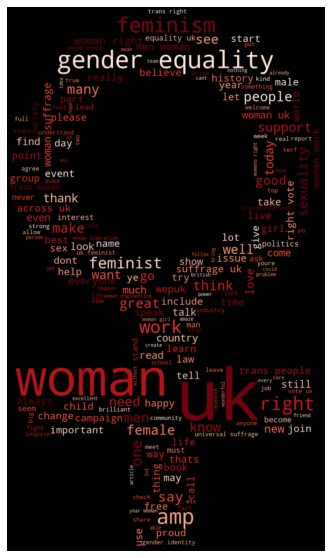

In [53]:
pos = sentiment[sentiment.pol == 1] #Tweets with polarity of 1 are classed as positive
p_string = []
for t in pos.lemmatized:
    p_string.append(t)
p_string = pd.Series(p_string).str.cat(sep=' ') #Strings displayed and separated 
wordcloud = WordCloud(background_color="black",width=1600, height=800,max_font_size=200,colormap='Reds',mask=mask).generate(p_string) #Warmer colours to match the positivity
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

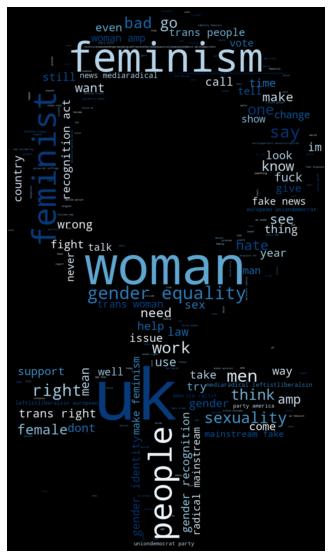

In [54]:
neg = sentiment[sentiment.pol == -1] #Tweets with polarity of -1 are classed as negative
p_string = []
for t in neg.lemmatized:
    p_string.append(t)
p_string = pd.Series(p_string).str.cat(sep=' ') #Strings displayed and separated 
wordcloud = WordCloud(background_color="black",width=1600, height=800,max_font_size=200,colormap='Blues',mask=mask).generate(p_string) #Cooler colours to match the negativity
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

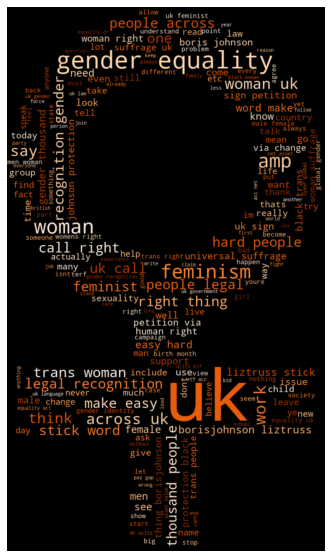

In [55]:
neut = sentiment[sentiment.pol == 0] #Tweets with polarity of 0 are classed as neutral
p_string = []
for t in neut.lemmatized:
    p_string.append(t)
p_string = pd.Series(p_string).str.cat(sep=' ') #Strings displayed and separated 
wordcloud = WordCloud(background_color="black",width=1600, height=800,max_font_size=200,colormap='Oranges',mask=mask).generate(p_string) #Warmer colours to match the vibe
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

### Funnel Chart of Polarity 

In [56]:
temp = sentiment.groupby('pol').count()['lemmatized'].reset_index().sort_values(by='lemmatized',ascending=False)
temp.style.background_gradient(cmap='Purples')


In [57]:
fig = go.Figure(go.Funnelarea(
    text =temp.pol,
    values = temp.lemmatized,
    title = {"position": "top center", "text": "Funnel Chart of Polarity Distribution"}
    ))

fig.update_layout(autosize=False, width=500, height=500)
fig.show()

This shows us that there is currently bias in the data as the classes are not balanced. We will therefore look into undersampling and oversampling methods with the models to rectify this. We can compare the results from these to a model using this imbalanced data to see the difference this will make.

# PART 8: VECTORIZATION, SPLITTING THE DATA AND COMPILING THE MODELS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
cvec = CountVectorizer(stop_words='english') #CountVectorizer and TfidfTransform have been used but it is also an option to use TfidfVectorizer to do the same thing.
data_cvec = cvec.fit_transform(sentiment.lemmatized)
data_cvec.shape #shape of the data once vectorized

(74167, 71658)

In [ ]:
tf_trans = TfidfTransformer(use_idf=True).fit(data_cvec)

In [ ]:
data_tf = tf_trans.transform(data_cvec) #Testing out how this would change the shape of the data
data_tf.shape

(74167, 71658)

## Splitting the Data

In [ ]:
X = sentiment['lemmatized']
y = sentiment['pol']

Below when splitting the data, we use the stratify parameter to keep the class imbalance in each split. The data is shuffled as it is currently in order of date so we want to shuffle this to avoid model bias. The random state is set to 42 so that we will always get the same results. No validation set has been used as we do not want to remove any important data which could negatively impact the accuracy of the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

## NB1: MULTINOMIAL NAIVE BAYES MODEL

For each of the 6 models, the following are shown after the model pipeline is fitted:

*   Accuracy Score
*   Hamming Loss
*   Classification Report
*   Confusion Matrix


In [ ]:
mnb = MultinomialNB() #Building a baseline pipeline

In [ ]:
nb1 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [ ]:
nb1.fit(X_train, y_train) #fitting the original pipeline to the train data

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
nb1_predictions = nb1.predict(X_test)

In [ ]:
np.mean(nb1_predictions == y_test) #Accuracy is around 70%

0.6971821491168936

In [ ]:
hamming_loss(y_test, nb1_predictions) #Hamming loss shows us the loss, or the opposite of accuracy

0.30281785088310637

In [ ]:
target_names = ['negative', 'neutral', 'positive']

In [ ]:
print(classification_report(y_test, nb1_predictions, target_names=target_names)) #full classification report showing precision, recall, F1 and support

              precision    recall  f1-score   support

    negative       0.89      0.04      0.07       939
     neutral       0.69      0.99      0.81      9812
    positive       0.89      0.14      0.24      4083

    accuracy                           0.70     14834
   macro avg       0.82      0.39      0.37     14834
weighted avg       0.76      0.70      0.61     14834



## Confusion Matrix

A confusion matrix is used as an evaluation metric for all 6 models. As the issue here is class imbalance, it is interesting to look at how the predicted labels compare to true labels, particularly for the negative class.

In [ ]:
metrics.confusion_matrix(y_test, nb1_predictions) #not normalised

array([[  34,  904,    1],
       [   4, 9740,   68],
       [   0, 3515,  568]])

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  #import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

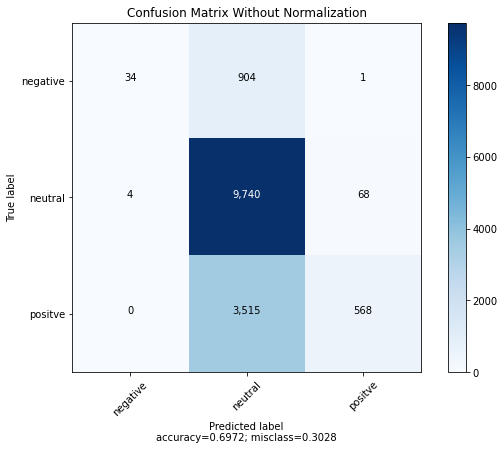

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 34,  904,   1],
                                              [  4,  9740,  68],
                                              [  0,  3515, 568]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

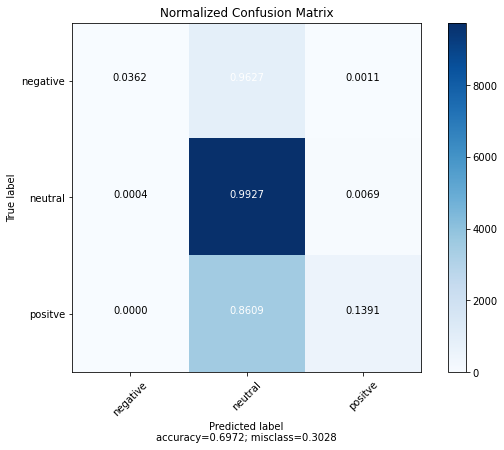

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 34,  904,   1],
                                              [  4,  9740,  68],
                                              [  0,  3515, 568]]), 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix")

## NB2: MULTINOMIAL NAIVE BAYES WITH OVERSAMPLING

Using the original pipeline as a baseline, oversampling techniques are employed which seeks to create synthetic instances of the negative class in order to mitigate class imbalance.

NB: Imblearn is deprecated in version 0.22

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
smt = SMOTE(random_state=42)

In [ ]:
nb2 = make_pipeline(cvec, tf_trans, smt, mnb)

In [ ]:
nb2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=Non...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, 

In [ ]:
nb2_predictions= nb2.predict(X_test)

In [ ]:
np.mean(nb2_predictions == y_test) #Accuracy less than NB1 

0.6391398139409464

In [ ]:
hamming_loss(y_test, nb2_predictions)

0.3608601860590535

In [ ]:
print(classification_report(y_test, nb2_predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.26      0.68      0.38       939
     neutral       0.84      0.60      0.70      9812
    positive       0.55      0.73      0.62      4083

    accuracy                           0.64     14834
   macro avg       0.55      0.67      0.57     14834
weighted avg       0.73      0.64      0.66     14834



## Confusion matrix

In [ ]:
metrics.confusion_matrix(y_test, nb2_predictions) #not normalised

array([[ 637,  245,   57],
       [1535, 5881, 2396],
       [ 279,  841, 2963]])

In [ ]:
#Function plot confusion matrix


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  #import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy #misclass for each target name is calculated

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #first confusion matrix not normalized and second is normalized for each model

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

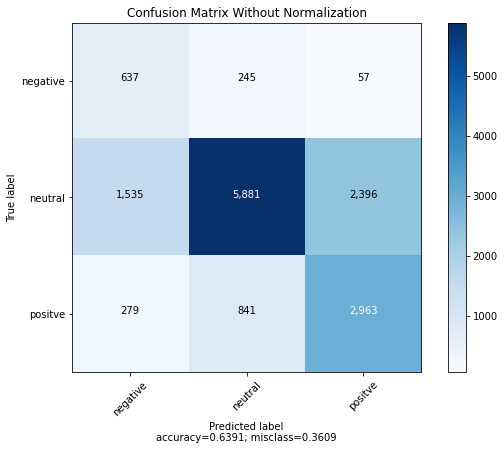

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 637,  245,   57], #using confusion matrix data supplied above 
                                              [  1535,  5881,  2396],
                                              [  279,  841, 2963]]), 
                      normalize    = False, #first without normalization
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

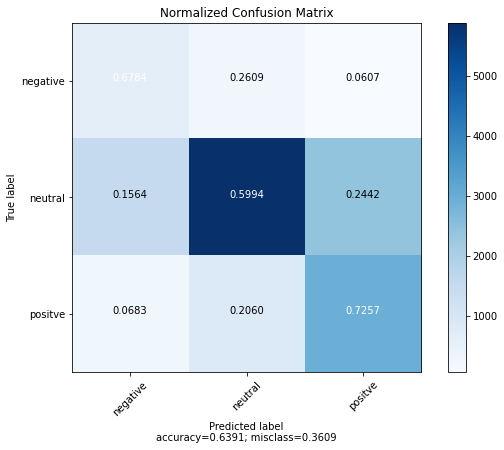

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 637,  245,   57],
                                              [  1535,  5881,  2396],
                                              [  279,  841, 2963]]), 
                      normalize    = True, #normalized
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix")

## NB3: NAIVE BAYES WITH UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #Imbalanced learn library  will be removed in version 0.24. Used here as an excellent undersampling technique

In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
nb3 = make_pipeline(cvec, tf_trans, rus, mnb) #added to original pipeline just like oversampling package

In [ ]:
nb3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidftransformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42, ratio=None,
                                    replacemen

In [ ]:
nb3_predictions = nb3.predict(X_test)

In [ ]:
np.mean(nb3_predictions == y_test)

0.5796818120533909

In [ ]:
hamming_loss(y_test, nb3_predictions)

0.42031818794660913

In [ ]:
print(classification_report(y_test, nb3_predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.22      0.81      0.35       939
     neutral       0.84      0.51      0.63      9812
    positive       0.52      0.70      0.60      4083

    accuracy                           0.58     14834
   macro avg       0.53      0.67      0.53     14834
weighted avg       0.72      0.58      0.61     14834



## Confusion Matrix

In [ ]:
metrics.confusion_matrix(y_test, nb3_predictions) #not normalised

array([[ 760,  121,   58],
       [2257, 4993, 2562],
       [ 430,  807, 2846]])

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  #import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

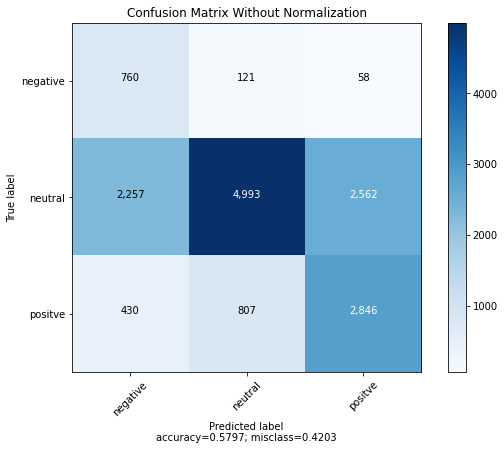

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 760,  121,   58],
                                              [  2257,  4993,  2562],
                                              [  430,  807, 2846]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

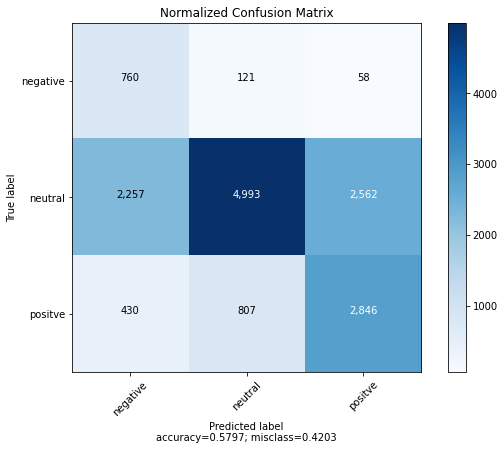

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 760,  121,   58],
                                              [  2257,  4993,  2562],
                                              [  430,  807, 2846]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix")

## SVM1: SVM ORIGINAL MODEL

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC() #Adding SVM to the pipeline to create a baseline pipeline on which oversampling or undersampling methods can be applied.

In [ ]:
svm1 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
])

In [ ]:
svm1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [ ]:
svm1_predictions = svm1.predict(X_test)

In [ ]:
np.mean(svm1_predictions == y_test)

0.8187272482135635

In [ ]:
hamming_loss(y_test, svm1_predictions)

0.18127275178643656

In [ ]:
print(classification_report(y_test, svm1_predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.70      0.39      0.50       939
     neutral       0.83      0.91      0.87      9812
    positive       0.79      0.70      0.74      4083

    accuracy                           0.82     14834
   macro avg       0.78      0.66      0.70     14834
weighted avg       0.81      0.82      0.81     14834



## Confusion Matrix

In [ ]:
metrics.confusion_matrix(y_test, svm1_predictions)

array([[ 363,  555,   21],
       [ 147, 8939,  726],
       [   8, 1232, 2843]])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

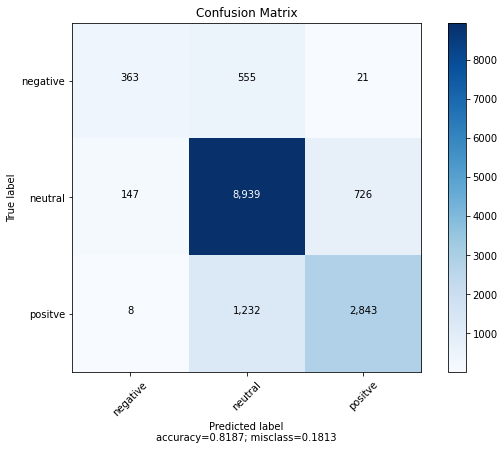

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 363,  555,   21],
                                              [  147,  8939,  726],
                                              [  8,  1232, 2843]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

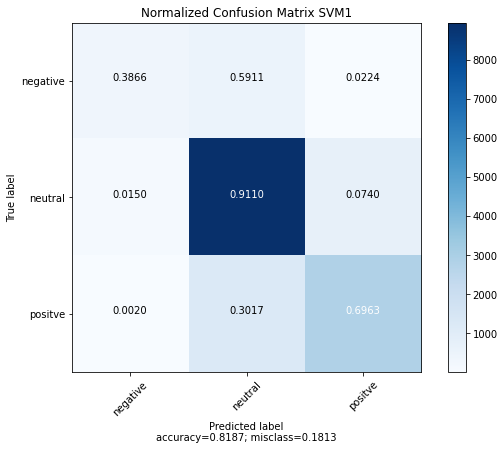

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 363,  555,   21],
                                              [  147,  8939,  726],
                                              [  8,  1232, 2843]]), 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix SVM1")

## SVM2: SVM MODEL WITH OVERSAMPLING

In [ ]:
svm2 = make_pipeline(cvec, tf_trans, smt, svc) #pipeline using SMOTE, just as was done with NB2

In [ ]:
svm2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=Non...
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit

In [ ]:
svm2_predictions= svm2.predict(X_test)

In [ ]:
np.mean(svm2_predictions == y_test)

0.7717405959282729

In [ ]:
hamming_loss(y_test, svm2_predictions)

0.22825940407172712

In [ ]:
print(classification_report(y_test, svm2_predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.49      0.63      0.55       939
     neutral       0.86      0.79      0.82      9812
    positive       0.67      0.75      0.71      4083

    accuracy                           0.77     14834
   macro avg       0.67      0.73      0.70     14834
weighted avg       0.78      0.77      0.78     14834



In [ ]:
metrics.confusion_matrix(y_test, svm2_predictions)

array([[ 596,  309,   34],
       [ 573, 7780, 1459],
       [  51,  960, 3072]])

In [ ]:



def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

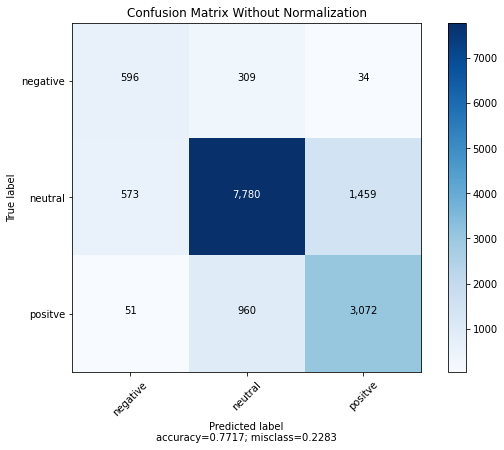

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 596,  309,   34],
                                              [  573,  7780,  1459],
                                              [  51,  960, 3072]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

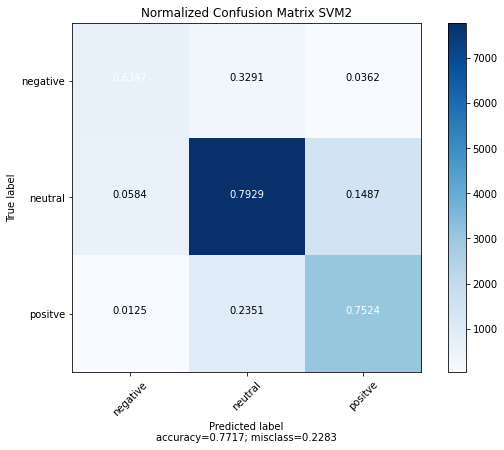

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 596,  309,   34],
                                              [  573,  7780,  1459],
                                              [  51,  960, 3072]]), 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix SVM2")

## SVM3: SVM MODEL WITH UNDERSAMPLING

In [ ]:
svm3 = make_pipeline(cvec, tf_trans, rus, svc) #adding undersampling technique to the pipeline.

In [ ]:
svm3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=Non...
                ('randomundersampler',
                 RandomUnderSampler(random_state=42, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True

In [ ]:
svm3_predictions= svm3.predict(X_test)

In [ ]:
np.mean(svm3_predictions == y_test)

0.6547795604691924

In [ ]:
hamming_loss(y_test, svm3_predictions)

0.3452204395308076

In [ ]:
print(classification_report(y_test, svm3_predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.30      0.81      0.44       939
     neutral       0.86      0.60      0.71      9812
    positive       0.56      0.74      0.64      4083

    accuracy                           0.65     14834
   macro avg       0.57      0.72      0.60     14834
weighted avg       0.74      0.65      0.67     14834



## Confusion Matrix

In [ ]:
metrics.confusion_matrix(y_test, svm3_predictions) #not normalised

array([[ 759,  121,   59],
       [1571, 5915, 2326],
       [ 173,  871, 3039]])

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  #import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

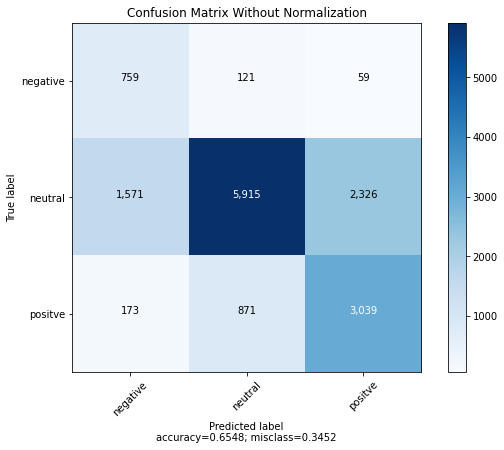

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 759,  121,   59],
                                              [  1571,  5915,  2326],
                                              [  173,  871, 3039]]), 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Confusion Matrix Without Normalization")

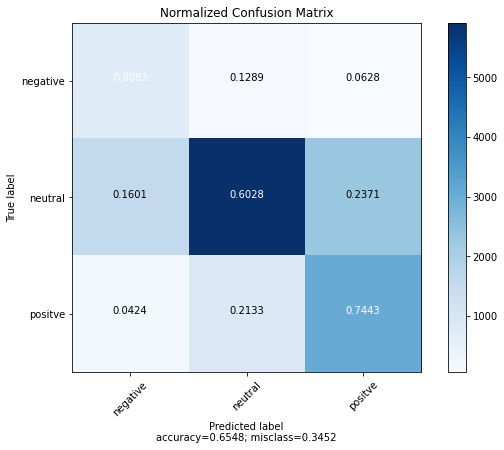

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 759,  121,   59],
                                              [  1571,  5915,  2326],
                                              [  173,  871, 3039]]), 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positve'],
                      title        = "Normalized Confusion Matrix")

# Model Score Comparison Bar Chart

The following is a comparison of the accuracy, precision, recall and F1 scores for all 6 models. Of course, we have gone through each model in detail by using multiple error and evaluation metrics but this emphasises the differences between the models in a way which is clearer and easier to comprehend.

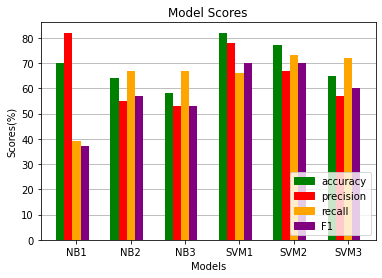

In [ ]:
import matplotlib.patches as mpatches

accuracy = [70, 64, 58, 82, 77, 65] #the scores, all in the same order.
precision = [82, 55, 53, 78, 67, 57]
recall = [39, 67, 67, 66, 73, 72]
F1 = [37, 57, 53, 70, 70, 60]

x = np.arange(len(accuracy))
bar_width = 0.15 #0.15 is a good size to fit in all model scores. 
plt.bar(x, accuracy, width=bar_width, color='green', zorder=2) #Each scoring metric has been assigned a different colour
plt.bar(x + bar_width, precision, width=bar_width, color='red', zorder=2)
plt.bar(x + bar_width*2, recall, width=bar_width, color='orange', zorder=2)
plt.bar(x + bar_width*3, F1, width=bar_width, color='purple', zorder=2)

plt.xticks(x + bar_width*2, ['NB1', 'NB2', 'NB3', 'SVM1', 'SVM2', 'SVM3']) #Order of the models
plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores(%)')

green_patch = mpatches.Patch(color='green', label='accuracy') #the patches are the handles in the legend
red_patch = mpatches.Patch(color='red', label='precision')
orange_patch = mpatches.Patch(color='orange', label='recall')
purple_patch = mpatches.Patch(color='purple', label='F1')

legend = plt.legend(handles=[green_patch, red_patch, orange_patch, purple_patch], loc='lower right') #placement of the legend

plt.grid(axis='y')

plt.show()